In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
Data_churn=pd.read_csv('customer_churn.csv')
Data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Data_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
list(Data_churn.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
Data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# X/y split
X = Data_churn[['SeniorCitizen','tenure','MonthlyCharges']]
y = Data_churn['Churn']

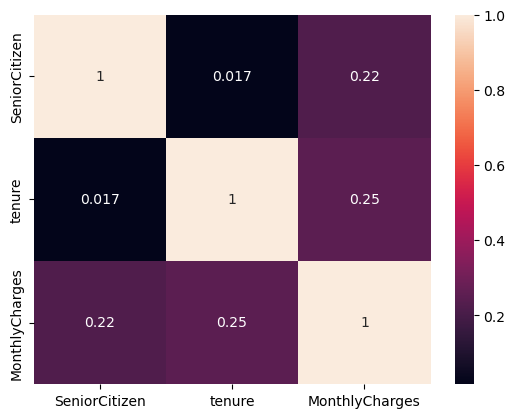

In [9]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Standardization of independent variables

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [14]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [26]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [27]:
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

# LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [29]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [30]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

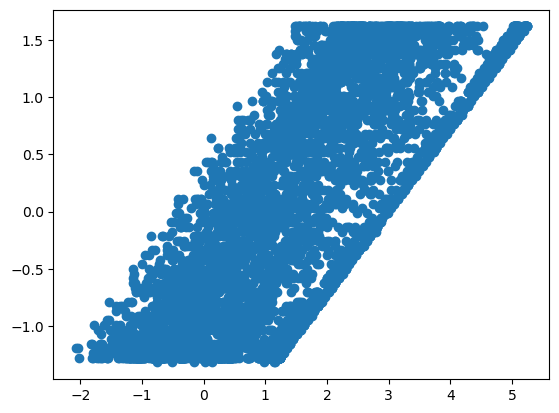

In [20]:
plt.scatter(logits,X_train_scaled['tenure'])

# Imbalance and metrics

<Axes: >

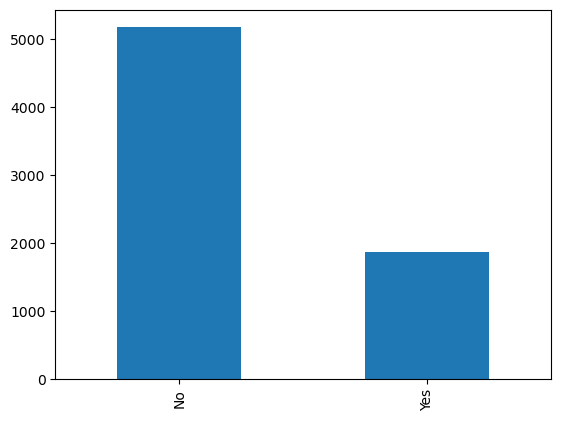

In [22]:
count_classes = Data_churn['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ", precision_score(y_test, pred, pos_label='Yes'))
print("recall: ", recall_score(y_test, pred, pos_label='Yes'))
print("f1: ", f1_score(y_test, pred, pos_label='Yes'))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

# SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [46]:
X_train_SMOTE.shape

(7752, 3)

In [48]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ", precision_score(y_test, pred, pos_label='Yes'))
print("recall: ", recall_score(y_test, pred, pos_label='Yes'))
print("f1: ", f1_score(y_test, pred, pos_label='Yes'))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [49]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)

# Undersampling

In [70]:
from sklearn.utils import resample

In [71]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,No
1,2.296336,0.883210,0.017840,No
2,-0.435476,-1.196572,-0.819594,Yes
3,-0.435476,1.168670,-1.483535,No
4,-0.435476,-0.829552,0.658427,Yes


In [85]:
no_Churn = train[train['Churn']== 'No']
yes_Churn = train[train['Churn']=='Yes']

In [87]:
display(no_Churn.shape)
display(yes_Churn.shape)

(3876, 4)

(1406, 4)

In [88]:
no_Churn_undersampled = resample(no_Churn, 
                                    replace=False, 
                                    n_samples = len(yes_Churn),
                                    random_state=0)

In [89]:
display(no_Churn_undersampled.shape)
display(yes_Churn.shape)

(1406, 4)

(1406, 4)

In [91]:
train_undersampled = pd.concat([yes_Churn,no_Churn_undersampled], axis=0)
train_undersampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
2,-0.435476,-1.196572,-0.819594,Yes
4,-0.435476,-0.829552,0.658427,Yes
12,-0.435476,-1.115012,0.630068,Yes
13,-0.435476,-1.237352,0.199673,Yes
15,-0.435476,-1.155792,0.698464,Yes


In [92]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [93]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ", precision_score(y_test, pred, pos_label='Yes'))
print("recall: ", recall_score(y_test, pred, pos_label='Yes'))
print("f1: ", f1_score(y_test, pred, pos_label='Yes'))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497


In [94]:
confusion_matrix(y_test,pred)

array([[934, 364],
       [131, 332]], dtype=int64)